In [1]:
### READ RESULTS INTO PANDAS DATAFRAME
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

resultsdir = "../../../ae-results"
# list all directories in resultsdir
configs = [d for d in os.listdir(resultsdir) if os.path.isdir(os.path.join(resultsdir, d))]
configs = ['Hydra1000.yaml'
           ,'Hydra500.yaml'
           ,'Hydra250.yaml'
           ,'Hydra125.yaml'
           ,'Baseline.yaml']
# print found configs
print('Found configs: {}'.format(configs))
# list all directories under all configs
workloads = []
for c in configs:
    workloads.append([d for d in os.listdir(os.path.join(resultsdir, c)) if os.path.isdir(os.path.join(resultsdir, c, d))])
# find only the intersection of all workloads
workloads = list(set.intersection(*map(set, workloads)))
# print found workloads
print('Found workloads: {}'.format(workloads))

stats_per_config_workload = []

# for every config + workload directory
for c in configs:
    for w in workloads:
        # find all files in the directory
        files = [f for f in os.listdir(os.path.join(resultsdir, c, w)) if os.path.isfile(os.path.join(resultsdir, c, w, f))]
        # find the stats file
        stat_files = [f for f in files if f.endswith('.stats')]
        # if there is a stats file
        if stat_files:
            for stat_file in stat_files:
                # if the stats_file has less than three lines skip it
                if len(open(os.path.join(resultsdir, c, w, stat_file)).readlines()) < 3:
                    continue
                
                # print the name of the stats_file
                print('Found stats file: {}'.format(os.path.join(os.path.join(resultsdir, c, w, stat_file))))

                extension = ''
                # if stats_file file name itself does not start with DDR4, parse it a bit
                if not stat_file.startswith('DDR4'):
                    # get the config name from the stats_file name
                    extension = '_'.join(stat_file.split('_')[:-1])
                    # prepend underscore to extension
                    extension = '_' + extension

                # read the stats file, name columns: 'name', 'value', 'description'
                df = pd.read_csv(os.path.join(resultsdir, c, w, stat_file), header=None).T
                df.columns = df.iloc[0]
                df.drop(0,inplace=True)
                # add a new column called 'config' with the config name
                df['config'] = c + extension
                # add a new column called 'workload' with the workload name
                df['workload'] = w
                # print the stats file
                # print('Config: {}, Workload: {}, Stats: {}'.format(c, w, df))
                # append the stats to the list
                df.reset_index(inplace=True, drop=True)
                stats_per_config_workload.append(df)
        else:
            print('Config: {}, Workload: {}, Stats: No stats file found'.format(c, w))

# concatenate all stats into one dataframe
stats = pd.concat(stats_per_config_workload)

# find elements where workload does not contain '-'
# these are multi core workloads
stats = stats[~stats['workload'].str.contains('-')]

# remove "-16DR" from config names
stats['config'] = stats['config'].str.replace('-16DR', '')

# replace 1K with 1000 in config names
stats['config'] = stats['config'].str.replace('1K', '1000')

# replace 'Baseline' with 'Baseline0'
stats['config'] = stats['config'].str.replace('Baseline', 'Baseline0')

# add a new column that stores in integer the number in the config name
stats['nrh'] = stats['config'].str.extract('(\d+)').astype(int)

# remove numbers from config names
stats['config'] = stats['config'].str.replace('\d+', '')

# remove yaml from config names
stats['config'] = stats['config'].str.replace('.yaml', '')

# increasing order of rbmpki
# order = ['511.povray', '481.wrf', '541.leela', '538.imagick', '444.namd', '447.dealII', '464.h264ref', '456.hmmer', '403.gcc', '526.blender', '544.nab', '525.x264', '508.namd', '531.deepsjeng', '458.sjeng', '435.gromacs', '445.gobmk', '401.bzip2', '507.cactuBSSN', '502.gcc', '500.perlbench', '523.xalancbmk', '510.parest', '557.xz', '482.sphinx3', '505.mcf', '436.cactusADM', '471.omnetpp', '473.astar', '483.xalancbmk', '462.libquantum', '433.milc', '520.omnetpp', '437.leslie3d', '450.soplex', '459.GemsFDTD', '549.fotonik3d', '434.zeusmp', '519.lbm', '470.lbm', '429.mcf']
#order = ['h264_encode', '511.povray', '481.wrf', '541.leela', '538.imagick', '444.namd', '447.dealII', '464.h264ref', '456.hmmer', '403.gcc', '526.blender', '544.nab', '525.x264', '508.namd', 'grep_map0', '531.deepsjeng', '458.sjeng', '435.gromacs', '445.gobmk', '401.bzip2', '507.cactuBSSN', '502.gcc', 'ycsb_abgsave', 'tpch6', '500.perlbench', '523.xalancbmk', 'ycsb_dserver', 'ycsb_cserver', '510.parest', 'ycsb_bserver', 'ycsb_eserver', 'stream_10.trace', 'tpcc64', 'ycsb_aserver', '557.xz', '482.sphinx3', 'jp2_decode', '505.mcf', 'wc_8443', 'wc_map0', '436.cactusADM', '471.omnetpp', '473.astar', 'jp2_encode', 'tpch17', '483.xalancbmk', '462.libquantum', 'tpch2', '433.milc', '520.omnetpp', '437.leslie3d', '450.soplex', '459.GemsFDTD', '549.fotonik3d', '434.zeusmp', '519.lbm', '470.lbm', '429.mcf', 'random_10.trace', 'h264_decode', 'bfs_ny', 'bfs_cm2003', 'bfs_dblp']

# order workloads according to the order
#stats['workload'] = pd.Categorical(stats['workload'], categories=order, ordered=True)

stats_copy = stats.copy()

Found configs: ['Hydra1000.yaml', 'Hydra500.yaml', 'Hydra250.yaml', 'Hydra125.yaml', 'Baseline.yaml']
Found workloads: ['523.xalancbmk-523.xalancbmk-523.xalancbmk-523.xalancbmk-523.xalancbmk-523.xalancbmk-523.xalancbmk-523.xalancbmk', 'bfs_ny', 'ycsb_eserver', '458.sjeng-458.sjeng-458.sjeng-458.sjeng-458.sjeng-458.sjeng-458.sjeng-458.sjeng', '447.dealII', '435.gromacs-435.gromacs-435.gromacs-435.gromacs-435.gromacs-435.gromacs-435.gromacs-435.gromacs', 'jp2_decode', '471.omnetpp', '538.imagick-538.imagick-538.imagick-538.imagick-538.imagick-538.imagick-538.imagick-538.imagick', 'tpch6-tpch6-tpch6-tpch6-tpch6-tpch6-tpch6-tpch6', 'ycsb_bserver-ycsb_bserver-ycsb_bserver-ycsb_bserver-ycsb_bserver-ycsb_bserver-ycsb_bserver-ycsb_bserver', 'ycsb_dserver-ycsb_dserver-ycsb_dserver-ycsb_dserver-ycsb_dserver-ycsb_dserver-ycsb_dserver-ycsb_dserver', '447.dealII-447.dealII-447.dealII-447.dealII-447.dealII-447.dealII-447.dealII-447.dealII', '445.gobmk-445.gobmk-445.gobmk-445.gobmk-445.gobmk-445.gobm

In [2]:
# drop workloads that has - character in them
stats = stats[~stats['workload'].str.contains('-')]

# instructions per cycle (IPC) is record_cycles_insts_0 / record_cycs_core_0
stats['ramulator.ipc'] = stats['ramulator.record_insts_core_0'] / stats['ramulator.record_cycs_core_0']


stats['ramulator.rbmpki'] = (stats['ramulator.row_conflicts_channel_0_core'] + stats['ramulator.row_misses_channel_0_core']) /\
                            stats['ramulator.record_insts_core_0'] * 1000


# copy the IPC of the baseline config as to all configs
baseline = stats[stats['config'] == 'Baseline0']
baseline = baseline[['workload', 'ramulator.ipc', 'ramulator.read_latency_avg_0', 'ramulator.rbmpki', 'ramulator.window_full_stall_cycles_core_0']]
# baseline
baseline.columns = ['workload', 'ramulator.baseline_ipc', 'ramulator.baseline_read_latency_avg_0', 'ramulator.baseline_rbmpki', 'ramulator.baseline_stall_cycles']
print('baseline:')
print(baseline)

stats = pd.merge(stats, baseline, on='workload')


#hydra baseline
# hydra_baseline = stats[stats['config'] == 'Hydra-Baseline']
# hydra_baseline = hydra_baseline[['workload', 'ramulator.ipc']]
# # hydra_baseline
# hydra_baseline.columns = ['workload', 'ramulator.hydra_baseline_ipc']
# stats = pd.merge(stats, hydra_baseline, on='workload')

stats['ramulator.normalized_ipc'] = stats['ramulator.ipc'] / stats['ramulator.baseline_ipc']
stats['ramulator.normalized_read_latency'] = stats['ramulator.read_latency_avg_0'] / stats['ramulator.baseline_read_latency_avg_0']
stats['ramulator.normalized_stall_cycles'] = stats['ramulator.window_full_stall_cycles_core_0'] / stats['ramulator.baseline_stall_cycles']
stats['ramulator.normalized_rbmpki'] = stats['ramulator.rbmpki'] / stats['ramulator.baseline_rbmpki']

baseline:
        workload ramulator.baseline_ipc ramulator.baseline_read_latency_avg_0  \
0         bfs_ny               0.255282                            180.842328   
0   ycsb_eserver               1.993455                             67.325288   
0     447.dealII               3.939674                             50.321969   
0     jp2_decode               2.207907                             63.754479   
0    471.omnetpp               3.440069                             47.947463   
..           ...                    ...                                   ...   
0      473.astar               1.431626                             61.938013   
0   ycsb_bserver               1.859058                             63.329721   
0     bfs_cm2003               0.254852                             180.76359   
0        505.mcf               1.927706                             45.998806   
0      541.leela               3.705667                             62.813485   

   ramulator.base

In [3]:
import re

sns.set(font_scale=1.0)
sns.set_style("whitegrid")
sns.set_palette('icefire', n_colors=7)

# remove all config integers from stats_comparison
stats['config'] = stats['config'].apply(lambda x: re.sub(r'\d+', '', x))

print(stats['config'].unique())


# remove config Baseline0 from stats_no_baseline
stats_new = stats[~stats['config'].str.contains('Baseline')]
print(stats_new['config'].unique())




['Hydra' 'Baseline']
['Hydra']


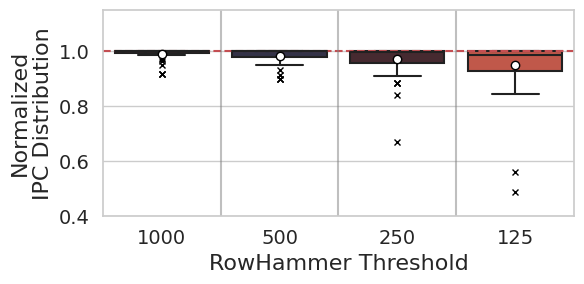

In [6]:


# order nRH from high to low
#stats_no_baseline['counters'] = pd.Categorical(stats_no_baseline['counters'], categories=[128], ordered=True)
#
#stats_no_baseline['hashes'] = pd.Categorical(stats_no_baseline['hashes'], categories=[4], ordered=True)
#
#stats_no_baseline['entries'] = pd.Categorical(stats_no_baseline['entries'], categories=[32,64,128,256,512], ordered=True)
# remove stats with 64 and 32 nrh values
sns.set_palette('icefire', n_colors=4)
stats_new = stats_new[stats_new['nrh'] != 64]
stats_new = stats_new[stats_new['nrh'] != 32]

stats_new['nrh'] = pd.Categorical(stats_new['nrh'], categories=[1000,500,250,125], ordered=True)

#boxplot of normalized IPC
fig, ax = plt.subplots(figsize=(6, 3))
# show mean values as well
ax = sns.boxplot(x="nrh", y="ramulator.normalized_ipc", data=stats_new, showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"}, showfliers=True, flierprops={'marker': 'x', 'markerfacecolor': 'black', 'markeredgecolor': 'black'})
ax.set_xlabel('RowHammer Threshold')
ax.set_ylabel('Normalized\nIPC Distribution')
# draw a red line at y = 1.0, label it as baseline IPC
ax.axhline(y=1.0, color='r', linestyle='--')
# write above the red line 'baseline IPC'
#ax.text(0.02, 0.91, 'baseline IPC', color='#e74c3c', transform=ax.transAxes, fontsize=15)
# extend the y axis to 1.2
ax.set_ylim(0.4, 1.15)
# color the 5th y tick red
# make axis tick font bigger
ax.tick_params(axis='both', which='major', labelsize=14)
# draw vertical lines to separate the rowhammer threshold values
ax.axvline(x=0.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=1.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=2.5, color='grey', linestyle='-', alpha=0.5)
# make x and y axis labels bigger
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)

# Customize the whiskers and borders
ax.lines[0].set_color('black')  # Set the color of the whiskers\

# change color palette

# put the legend on top of the plot
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, fancybox=True, shadow=True, fontsize=12)
# add legend title as "counters per hash"
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, fancybox=True, shadow=False, fontsize=12, framealpha=1)

plt.tight_layout()
plt.show()


# save figure
fig.savefig('hydra_performance.pdf', bbox_inches='tight')
# export data to csv

In [13]:
geometric_mean = stats.groupby(['config','nrh'])['ramulator.normalized_ipc'].apply(lambda x: x.prod()**(1.0/len(x))).reset_index()
geometric_mean['workload'] = 'GeoMean'

#print(stats['config'])


stats = pd.concat([stats, geometric_mean])

# print geomean for each config
#print(geometric_mean)

performance_overhead_1k = 1.0 - geometric_mean[geometric_mean['nrh'] == 1000]['ramulator.normalized_ipc'].values[0]
performance_overhead_125 = 1.0 - geometric_mean[geometric_mean['nrh'] == 125]['ramulator.normalized_ipc'].values[0]


min_performance = stats.groupby(['config','nrh'])['ramulator.normalized_ipc'].min().reset_index()
#print(min_performance)

max_performance_overhead_1k = 1.0 - min_performance[min_performance['nrh'] == 1000]['ramulator.normalized_ipc'].values[0]
max_performance_overhead_125 = 1.0 - min_performance[min_performance['nrh'] == 125]['ramulator.normalized_ipc'].values[0]


print("Performance overhead 1k:\t\t", performance_overhead_1k*100)
print("Maximum Performance overhead 1k:\t", max_performance_overhead_1k*100)
print("Performance overhead 125:\t\t", performance_overhead_125*100)
print("Maximum Performance overhead 125:\t", max_performance_overhead_125*100)


Performance overhead 1k:		 0.8559609679801072
Maximum Performance overhead 1k:	 8.18971618976071
Performance overhead 125:		 5.66460998645506
Maximum Performance overhead 125:	 51.24334187313717
